<a href="https://colab.research.google.com/github/SasiwimonV/bsc_dpdm22/blob/main/Classification_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib.pyplot as plt

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

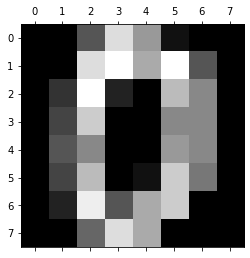

In [3]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

8


<Figure size 432x288 with 0 Axes>

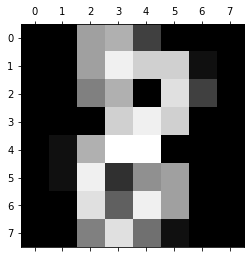

In [4]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])
# plt.show()

8


<Figure size 432x288 with 0 Axes>

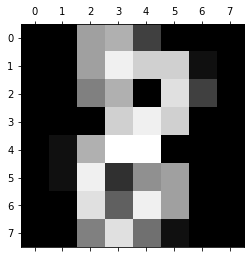

In [5]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

#Quiz 3 march
- แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ ranom_state = 6 shuffle = True
- หา parameters ที่ดีที่สุด (K (1,3,5), Distance_weighted(yes/no)) ด้วย 10 - fold-cross-validation
- test parameters ที่ดีที่สุด กับ test data


In [6]:
from sklearn.model_selection import train_test_split

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 4 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = [1, 3, 5]
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'weights': weight_options}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                 weights=grid_search.best_params_['weights'])

best_knn.fit(X_train, y_train)

accuracy = best_knn.score(X_test, y_test)

print("Accuracy on test data: {:.2f}%".format(accuracy * 100))

Best Parameters:  {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy on test data: 98.61%


#Quiz 3 march ANS

#Model selection

##Model 1 (K=1, weighted)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier

# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

# #Evaluate with test set
# knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
# knn_distance.fit(X_train,y_train)
# y_pred = knn_distance.predict(X_test)
     
# from sklearn.metrics import accuracy_score
# # Assume y_true and y_pred are the true and predicted labels, respectively
# accuracy = accuracy_score(y_test, y_pred)
# # Print the accuracy score
# print("Accuracy score: ", accuracy)

Mean Cross-Validation Score: K1weighted 0.9853875291375293
Mean Cross-Validation Score: K3weighted 0.9860819735819737
Mean Cross-Validation Score: K5weighted 0.9881750194250195
Mean Cross-Validation Score: K1NOweighted 0.9853875291375293
Mean Cross-Validation Score: K3NOweighted 0.9860819735819737
Mean Cross-Validation Score: KNOweighted 0.9881750194250195


#Evaluate with test set

In [8]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train,y_train)
y_pred = knn_distance.predict(X_test)
     
from sklearn.metrics import accuracy_score
# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Accuracy score:  0.9861111111111112


#HW7

#หาโมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets

#DecisionTree



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 4 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

# Define parameter set 1
params1 = {'criterion': 'gini', 'max_depth': 3}

# Define parameter set 2
params2 = {'criterion': 'entropy', 'max_depth': 5}

# Create decision tree with parameter set 1
dt1 = DecisionTreeClassifier(criterion=params1['criterion'], max_depth=params1['max_depth'])

# Create decision tree with parameter set 2
dt2 = DecisionTreeClassifier(criterion=params2['criterion'], max_depth=params2['max_depth'])

# Evaluate the decision tree with parameter set 1
accuracy1 = cross_val_score(dt1, digits.data, digits.target, cv=5).mean()

# Evaluate the decision tree with parameter set 2
accuracy2 = cross_val_score(dt2, digits.data, digits.target, cv=5).mean()

# Compare the accuracies of the two models and choose the one with the highest accuracy
if accuracy1 > accuracy2:
    print("DT1 Parameter set 1 is better with an accuracy of", accuracy1)
else:
    print("DT2 Parameter set 2 is better with an accuracy of", accuracy2)

# ค่า accuracy จะถูกคำนวณด้วย cross_val_score


DT2 Parameter set 2 is better with an accuracy of 0.7323800680903746


#NaiveBayes

In [10]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 4 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True  สลับลำดับข้อมูลก่อนแบ่งชุดเพื่อลดผลกระทบจากการจัดเรียงข้อมูล

# Parameter Set 1: สร้างโมเดล Multinomial Naive Bayes โดยกำหนด alpha=1.0 เพื่อใช้ Laplace smoothing
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
# คำนวณค่า accuracy ของโมเดลด้วยชุดข้อมูลทดสอบ (X_test, y_test)
mnb_score = mnb.score(X_test, y_test)

# Parameter Set 2: สร้างโมเดล Gaussian Naive Bayes โดยไม่ใช้ Smoothing
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)

# Print best model based on test set accuracy
if mnb_score > gnb_score:
    print("Best Model: Multinomial Naive Bayes with Laplace Smoothing")
    print("Test Accuracy: %0.2f" % mnb_score)
else:
    print("Best Model: Gaussian Naive Bayes without Smoothing")
    print("Test Accuracy: %0.2f" % gnb_score)

Best Model: Multinomial Naive Bayes with Laplace Smoothing
Test Accuracy: 0.90


- หลังจากที่ได้คำนวณค่าความแม่นยำของ Multinomial Naive Bayes และ Gaussian Naive Bayes จากข้อมูล test set แล้ว
- เงื่อนไขที่กำหนดใน if คือ mnb_score > gnb_score ซึ่งหมายความว่าถ้าโมเดล Multinomial Naive Bayes มีค่าความแม่นยำสูงกว่าโมเดล Gaussian Naive Bayes จะเข้าเงื่อนไข if 
- และทำงานในส่วนของคำสั่งที่อยู่ภายใน if โดยพิมพ์ข้อความ "Best Model: Multinomial Naive Bayes with Laplace Smoothing" และค่าความแม่นยำของโมเดล Multinomial Naive Bayes ที่ได้จากการทดสอบ 
- แต่ถ้าเงื่อนไขเป็นเท็จจะเข้าเงื่อนไข else และทำงานในส่วนของคำสั่งที่อยู่ภายใน else โดยพิมพ์ข้อความ "Best Model: Gaussian Naive Bayes without Smoothing" 

#KNN

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 4 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

# Define parameter sets
params_set_1 = {'n_neighbors': 3, 'weights': 'uniform'}
params_set_2 = {'n_neighbors': 5, 'weights': 'distance'}

# Train and test KNN models with parameter sets
knn_1 = KNeighborsClassifier(**params_set_1)
knn_1.fit(X_train, y_train)
print('KNN 1 accuracy:', knn_1.score(X_test, y_test))

knn_2 = KNeighborsClassifier(**params_set_2)
knn_2.fit(X_train, y_train)
print('KNN 2 accuracy:', knn_2.score(X_test, y_test))




KNN 1 accuracy: 0.9888888888888889
KNN 2 accuracy: 0.9861111111111112


#ANN

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 4 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

# กำหนด parameter sets ที่ต้องการทดสอบ
#กำหนด parameter sets ที่ต้องการทดสอบโดยกำหนด hidden_layer_sizes เป็นจำนวนโหนดใน Hidden layer และกำหนด activation เป็นฟังก์ชัน Activation function 
#และกำหนด solver เป็น Algorithm สำหรับ optimization
param_set_1 = {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'lbfgs'} 
param_set_2 = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'}

# สร้างและ train โมเดล ANN สำหรับ parameter sets ที่กำหนด โดยใช้ MLPClassifier และ fit โมเดลด้วยข้อมูล X_train และ y_train

model_1 = MLPClassifier(**param_set_1, random_state=42)
model_1.fit(X_train, y_train)

model_2 = MLPClassifier(**param_set_2, random_state=42)
model_2.fit(X_train, y_train)

# ประเมินประสิทธิภาพของโมเดล ANN กับ test set โดยใช้ predict เพื่อทำนายผลลัพธ์จากโมเดลและใช้ accuracy_score เพื่อคำนวณค่าความแม่นยำของโมเดล
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

#แสดงผลลัพธ์ค่าความแม่นยำของโมเดล ANN ของ parameter sets 1 และ 2
print(f"Accuracy for model 1 ANN1: {accuracy_1}")
print(f"Accuracy for model 2 ANN2: {accuracy_2}")

Accuracy for model 1 ANN1: 0.95
Accuracy for model 2 ANN2: 0.9833333333333333


#รวม

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 4 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

#DT
# Define parameter set 1
params1 = {'criterion': 'gini', 'max_depth': 3}
# Define parameter set 2
params2 = {'criterion': 'entropy', 'max_depth': 5}
# Create decision tree with parameter set 1
dt1 = DecisionTreeClassifier(criterion=params1['criterion'], max_depth=params1['max_depth'])
# Create decision tree with parameter set 2
dt2 = DecisionTreeClassifier(criterion=params2['criterion'], max_depth=params2['max_depth'])
# Evaluate the decision tree with parameter set 1
accuracy1 = cross_val_score(dt1, digits.data, digits.target, cv=5).mean()
# Evaluate the decision tree with parameter set 2
accuracy2 = cross_val_score(dt2, digits.data, digits.target, cv=5).mean()
# Compare the accuracies of the two models and choose the one with the highest accuracy
if accuracy1 > accuracy2:
    print("DT1 Parameter set 1 is better with an accuracy of", accuracy1)
else:
    print("DT2 Parameter set 2 is better with an accuracy of", accuracy2)

#NaiveBayes
# Parameter Set 1: Multinomial Naive Bayes with Laplace Smoothing
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
mnb_score = mnb.score(X_test, y_test)

# Parameter Set 2: Gaussian Naive Bayes without Smoothing
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)

# Print best model based on test set accuracy
if mnb_score > gnb_score:
    print("Best Model: Multinomial Naive Bayes with Laplace Smoothing")
    print("Test Accuracy: %0.2f" % mnb_score)
else:
    print("Best Model: Gaussian Naive Bayes without Smoothing")
    print("Test Accuracy: %0.2f" % gnb_score)

#KNN
# Define parameter sets
params_set_1 = {'n_neighbors': 3, 'weights': 'uniform'}
params_set_2 = {'n_neighbors': 5, 'weights': 'distance'}

# Train and test KNN models with parameter sets
knn_1 = KNeighborsClassifier(**params_set_1)
knn_1.fit(X_train, y_train)
print('KNN 1 accuracy:', knn_1.score(X_test, y_test))

knn_2 = KNeighborsClassifier(**params_set_2)
knn_2.fit(X_train, y_train)
print('KNN 2 accuracy:', knn_2.score(X_test, y_test))

#ANN
# กำหนด parameter sets ที่ต้องการทดสอบ
#กำหนด parameter sets ที่ต้องการทดสอบโดยกำหนด hidden_layer_sizes เป็นจำนวนโหนดใน Hidden layer และกำหนด activation เป็นฟังก์ชัน Activation function 
#และกำหนด solver เป็น Algorithm สำหรับ optimization
param_set_1 = {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'lbfgs'} 
param_set_2 = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'}

# สร้างและ train โมเดล ANN สำหรับ parameter sets ที่กำหนด โดยใช้ MLPClassifier และ fit โมเดลด้วยข้อมูล X_train และ y_train

model_1 = MLPClassifier(**param_set_1, random_state=42)
model_1.fit(X_train, y_train)

model_2 = MLPClassifier(**param_set_2, random_state=42)
model_2.fit(X_train, y_train)

# ประเมินประสิทธิภาพของโมเดล ANN กับ test set โดยใช้ predict เพื่อทำนายผลลัพธ์จากโมเดลและใช้ accuracy_score เพื่อคำนวณค่าความแม่นยำของโมเดล
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

#แสดงผลลัพธ์ค่าความแม่นยำของโมเดล ANN ของ parameter sets 1 และ 2
print(f"Accuracy for model 1 ANN1: {accuracy_1}")
print(f"Accuracy for model 2 ANN2: {accuracy_2}")



print('โมเดลที่ดีที่สุดคือ KNN 2 accuracy:', knn_2.score(X_test, y_test))



DT2 Parameter set 2 is better with an accuracy of 0.7334911792014858
Best Model: Multinomial Naive Bayes with Laplace Smoothing
Test Accuracy: 0.90
KNN 1 accuracy: 0.9888888888888889
KNN 2 accuracy: 0.9861111111111112
Accuracy for model 1 ANN1: 0.95
Accuracy for model 2 ANN2: 0.9833333333333333
โมเดลที่ดีที่สุดคือ KNN 2 accuracy: 0.9861111111111112
